### Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load Dataset

In [13]:
dataset_path = 'data/titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [14]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]
X.shape, y.shape

((891, 8), (891,))

### Add Bias Term

In [15]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

### Split Data

In [16]:
val_size, test_size = 0.2, 0.125
random_state = 2
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(623, 9) (623,)
(179, 9) (179,)
(89, 9) (89,)


In [17]:
X_train

array([[  1.    ,   3.    ,   0.    , ...,  14.4542,   1.    ,   0.    ],
       [  1.    ,   1.    ,   0.    , ..., 120.    ,   0.    ,   0.    ],
       [  1.    ,   3.    ,   0.    , ...,   7.875 ,   0.    ,   0.    ],
       ...,
       [  1.    ,   3.    ,   0.    , ...,   7.75  ,   2.    ,   0.    ],
       [  1.    ,   3.    ,   0.    , ...,  20.525 ,   0.    ,   0.    ],
       [  1.    ,   3.    ,   0.    , ...,  29.125 ,   2.    ,   3.    ]])

### Standardize features

In [18]:
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_val[:, 1:] = scaler.transform(X_val[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

### Train

In [19]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)

In [20]:
from train_logistic_regression import train
from logistic_regression_funcs import *

theta, train_acc, train_losses, val_acc, val_losses = train(X_train, y_train, X_val, y_val, lr, epochs, batch_size)

Epoch 1/100, train_loss: 0.703, train_acc: 0.656, val_loss: 0.599, val_acc: 0.710
Epoch 2/100, train_loss: 0.670, train_acc: 0.671, val_loss: 0.582, val_acc: 0.715
Epoch 3/100, train_loss: 0.640, train_acc: 0.685, val_loss: 0.567, val_acc: 0.720
Epoch 4/100, train_loss: 0.614, train_acc: 0.699, val_loss: 0.555, val_acc: 0.728
Epoch 5/100, train_loss: 0.592, train_acc: 0.706, val_loss: 0.544, val_acc: 0.744
Epoch 6/100, train_loss: 0.572, train_acc: 0.731, val_loss: 0.535, val_acc: 0.749
Epoch 7/100, train_loss: 0.554, train_acc: 0.747, val_loss: 0.528, val_acc: 0.744
Epoch 8/100, train_loss: 0.539, train_acc: 0.759, val_loss: 0.522, val_acc: 0.748
Epoch 9/100, train_loss: 0.526, train_acc: 0.765, val_loss: 0.517, val_acc: 0.744
Epoch 10/100, train_loss: 0.514, train_acc: 0.770, val_loss: 0.513, val_acc: 0.744
Epoch 11/100, train_loss: 0.504, train_acc: 0.773, val_loss: 0.509, val_acc: 0.750
Epoch 12/100, train_loss: 0.495, train_acc: 0.777, val_loss: 0.507, val_acc: 0.754
Epoch 13/100,

### Visualize

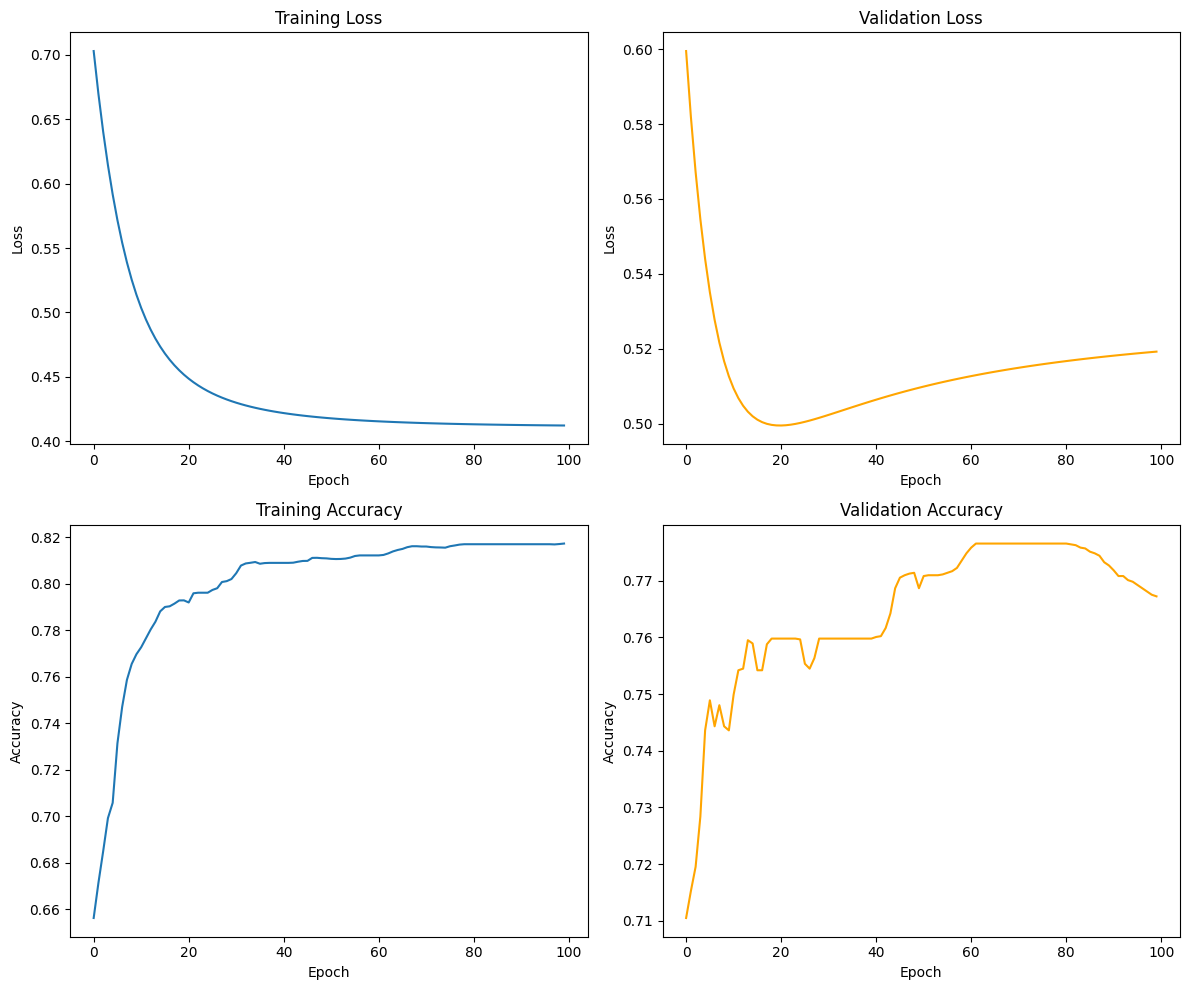

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_acc)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_acc, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.tight_layout()
plt.show()

### Validation

In [22]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'val_acc: {val_set_acc}')
print(f'test_acc: {test_set_acc}')

Evaluation on validation and test set:
val_acc: 0.770949720670391
test_acc: 0.7752808988764045
